<a href="https://colab.research.google.com/github/rgaguiar/Overview_Apache_Beam/blob/main/Apache_Beam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Apache Beam**
--- 
Processo e analise streaming de dados

![img](https://i0.wp.com/i.postimg.cc/05GbBjLt/Apache-Beam.png?resize=810%2C456&ssl=1)


Conforme a própria documentação, o Apache beam é definido como um modelo de programação unificado de código aberto para descrever e executar pipelines de processamento paralelo de dados em lote e streaming.

O principal objetivo desse framework é a unificação de diferentes engimes de processamento de dados e SDKs (Software Development Kits), baseado no modelo de dataflow. Dessa forma, pode-se expressar qualquer pipeline de dados em uma linguagem familiar.

A palavra Beam é derivada dos dois conceitos que o framework unifica: batch e stream processing (batch + stream = beam). 




# **SDKs do Apache Beam**
---
Os SDKs do Beam fornecem um modelo de programação unificado que pode representar e transformar conjuntos de dados de qualquer tamanho, seja a entrada um conjunto de dados finito de uma fonte de dados em lote ou um conjunto de dados infinito de uma fonte de dados de streaming.

Atualmente, o Beam é compatível com os seguintes SDKs específicos de linguagem:

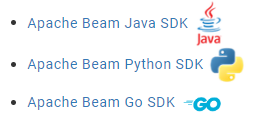

# **Apache Beam Pipeline Runners**
---
Os Beam Pipeline Runners traduzem o pipeline de processamento de dados que você define na API compatível com o back-end de processamento distribuído. Ao executar, é necessário especificar um executor apropriado para o back-end em que deseja executar seu pipeline.

O Beam atualmente suporta os seguintes Runners:

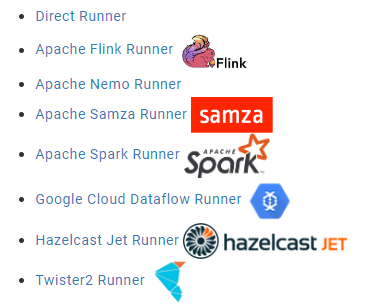

Os pipeline runners traduzem o pipeline que irá processar os dados que são definidos através do Beam em dados compatíveis com API. Quando se executa um programa do Beam é necessário especificar um runner apropriado para que seja possível executar o pipeline.


# **Recursos do Apache Beam**
---

* **Unificado**: Um modelo de programação único e simplificado para casos de uso de lote e streaming.
* **Portatil**:Executa pipelines em vários ambientes de execução (runners), proporcionando flexibilidade e evitando aprisionamento.
* **Extensível**: É extensível, com projetos como TensorFlow Extended e Apache Hop construídos sobre o Apache Beam.
* **Código Aberto**: Desenvolvimento e suporte abertos e baseados na comunidade para ajudar a evoluir seu aplicativo e atender às necessidades de seus casos de uso específicos.


# **Conceitos Básicos**
---



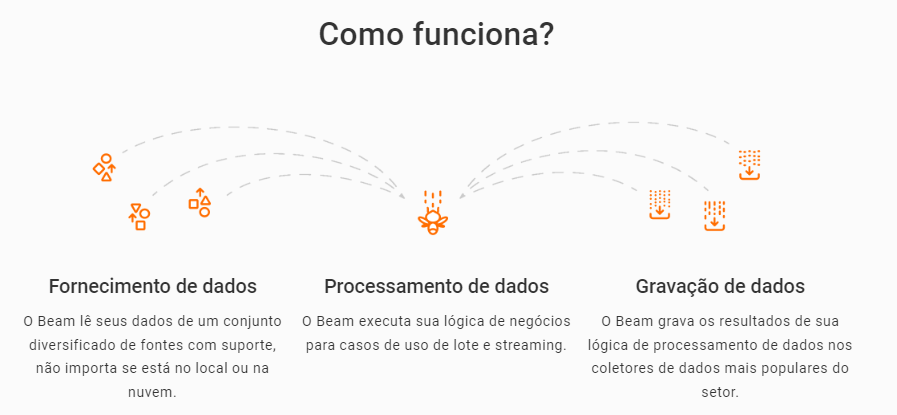  
Figura: imagem da documentação


## Visão Geral
Para usar o Beam, é necessário primeiro criar um programa de driver usando as classes em um dos SDKs. O seu programa de driver define seu pipeline, incluindo todas as entradas, transformações e saídas; ele também define opções de execução para seu pipeline (normalmente passadas usando opções de linha de comando). Isso inclui o Pipeline Runner, que, por sua vez, determina em qual back-end seu pipeline será executado.

Os SDKs do Beam fornecem várias abstrações que simplificam a mecânica do processamento de dados distribuídos em larga escala. Eles incluem:

* **Pipelines** O Pipeline encapsula toda a sua tarefa de processamento de dados, do início ao fim. 

* **PCollection** O PCollection representa um conjunto de dados distribuído no qual o pipeline opera.

* **PTransform** O PTransform representa uma operação de processamento de dados, ou uma etapa, em seu pipeline.

* **Transformações de E/S**: O Beam vem com vários “IOs” - bibliotecas PTransform que lêem ou gravam dados em vários sistemas de armazenamento externo.



## Transformações

O Beam fornece as seguintes transformações, cada uma representando um paradigma de processamento diferente:

* **ParDo**: é semelhante à fase “Map” de um algoritmo estilo `MapReduce`.
* **GroupBykey**: é uma transformação para processar coleções de pares chave/valor. É uma boa maneira de agregar dados que tenham algo em comum.
* **CoGroupByKey**: executa uma junção relacional de dois ou mais key/value `PCollections` que possuem o mesmo tipo de chave.
* **Combine**: é uma transformação para combinar coleções de elementos ou valores em seus dados.
* **Flatten** é uma transformação para `PCollection` objetos que armazenam o mesmo tipo de dados. `Flatten` mescla vários `PCollection` em um único arquivo lógico.
* **Partition**: é uma transformação para `PCollection` que armazenam o mesmo tipo de dados. `Partition` divide um single `PCollection` em um número fixo de coleções menores.

# **Case Prático**
---

#### Exemplo: vamos pegar cada elemento do PCollection de entrada e separar os pares dos impares.

In [2]:
!pip install --quiet apache-beam
#%pip install -q apache-beam[gcp,interactive] --no-warn-conflicts

In [3]:
import apache_beam as beam
import apache_beam.runners.interactive.interactive_beam as ib
from apache_beam.options.pipeline_options import PipelineOptions
from apache_beam.runners.interactive.interactive_runner import InteractiveRunner

In [4]:
class FiltrarMultiplicarMultiplos(beam.DoFn):
    def process(self, element):
        if element%2 == 0:
            yield beam.pvalue.TaggedOutput("par", element)
        else:
            yield beam.pvalue.TaggedOutput("impar", element)

        #yield element

In [5]:
pipeline = beam.Pipeline(InteractiveRunner(), options=PipelineOptions())
resultado = (
    pipeline
    | "Dados Númericos" >> beam.Create([1, 2, 3, 4, 5, 6, 7, 8, 9])
    | "Filtrar pares e impares" >> beam.ParDo(FiltrarMultiplicarMultiplos()).with_outputs("par", "impar")
)

In [6]:
# pegar os elemetos do resultado
pares = resultado.par
impares = resultado.impar
todos = resultado[None]

In [7]:
ib.show(pares, impares, todos)

In [8]:
ib.show_graph(pipeline)

/usr/bin/dot


# Referências
---

**Documentação do Apache Beam**. Disponível no [link](https://beam.apache.org/documentation/programming-guide/). Acesso em: 13 set. 2022.  
**Apache Beam Overview**. Disponível no [link](https://beam.apache.org/get-started/beam-overview/). Acesso em: 13 set. 2022.  
**Modelo de programação para o Apache Beam**. Disponível no [link](https://cloud.google.com/dataflow/docs/concepts/beam-programming-model?hl=pt-br#:~:text=O%20Apache%20Beam%20%C3%A9%20um,programa%20que%20define%20o%20pipeline). Acesso em: 14 set. 2022.  
**github rfribeiro/beam-workshop-campdata**. Disponível no [link](https://github.com/rfribeiro/beam-workshop-campdata/blob/main/Apache_Beam-Workshop.ipynb). Acesso em: 14 set. 2022.  
**Tour of Beam**. Diposnível em [link](https://beam.apache.org/get-started/tour-of-beam/). Acesso em: 15 set. 2022